In [6]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pyproj
from shapely import geometry
import matplotlib.pyplot as plt

gdb='/home/ggrl/geodatabase/'

%matplotlib inline

import my_funcs as mf

In [2]:
geof_1105 = pd.read_csv(gdb+'geof/g1105')

In [3]:
geof_1105['geometry'] = [geometry.Point(x, y) for x, y in zip(geof_1105['X'], geof_1105['Y'])]
geof_1105

,KPERC,eU,eTH,X,Y,MDT,CTCOR,LATITUDE,LONGITUDE,geometry
0,0.060,0.597,0.587,378133.94,7345653.93,0.00,3.305,-23.996399,-46.198067,POINT (378133.94 7345653.93)
1,0.139,0.332,0.824,378061.80,7345654.98,0.00,5.257,-23.996384,-46.198776,POINT (378061.8 7345654.98)
2,1.490,0.399,6.987,377989.96,7345656.47,0.14,8.125,-23.996365,-46.199482,POINT (377989.96 7345656.47)
3,1.975,1.459,6.574,377917.82,7345657.63,2.46,11.506,-23.996349,-46.200191,POINT (377917.82 7345657.63)
4,2.497,1.755,8.473,377845.99,7345659.12,12.47,14.051,-23.996330,-46.200897,POINT (377845.99 7345659.12)
...,...,...,...,...,...,...,...,...,...,...
1242649,0.509,0.373,15.020,602874.51,7526876.45,571.23,5.532,-22.360971,-44.000843,POINT (602874.51 7526876.45)
1242650,0.315,0.549,14.462,602872.51,7526806.94,578.02,5.043,-22.361599,-44.000858,POINT (602872.51 7526806.94)
1242651,0.282,1.005,17.569,602871.22,7526737.54,581.39,6.422,-22.362226,-44.000866,POINT (602871.22 7526737.54)
1242652,0.399,1.347,20.376,602870.35,7526668.02,577.24,8.287,-22.362854,-44.000870,POINT (602870.35 7526668.02)


In [4]:
crs = "+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
gdf = gpd.GeoDataFrame(geof_1105, geometry='geometry', crs=crs)

gdf.head(10)

,KPERC,eU,eTH,X,Y,MDT,CTCOR,LATITUDE,LONGITUDE,geometry
0,0.060,0.597,0.587,378133.94,7345653.93,0.00,3.305,-23.996399,-46.198067,POINT (378133.940 7345653.930)
1,0.139,0.332,0.824,378061.80,7345654.98,0.00,5.257,-23.996384,-46.198776,POINT (378061.800 7345654.980)
2,1.490,0.399,6.987,377989.96,7345656.47,0.14,8.125,-23.996365,-46.199482,POINT (377989.960 7345656.470)
3,1.975,1.459,6.574,377917.82,7345657.63,2.46,11.506,-23.996349,-46.200191,POINT (377917.820 7345657.630)
4,2.497,1.755,8.473,377845.99,7345659.12,12.47,14.051,-23.996330,-46.200897,POINT (377845.990 7345659.120)
5,2.576,1.438,10.757,377773.75,7345659.94,44.17,14.354,-23.996317,-46.201607,POINT (377773.750 7345659.940)
6,2.092,1.704,10.570,377701.20,7345660.99,61.90,13.856,-23.996302,-46.202320,POINT (377701.200 7345660.990)
7,1.811,2.038,11.297,377628.24,7345662.14,69.77,13.862,-23.996286,-46.203037,POINT (377628.240 7345662.140)
8,1.975,2.173,13.511,377555.29,7345662.95,67.61,14.363,-23.996273,-46.203754,POINT (377555.290 7345662.950)
9,1.820,2.161,14.720,377481.93,7345663.54,53.95,14.453,-23.996262,-46.204475,POINT (377481.930 7345663.540)


<AxesSubplot:>

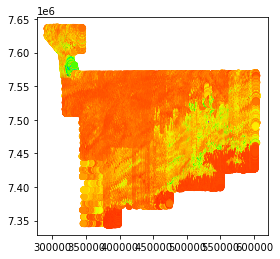

In [7]:
gdf.plot('CTCOR',cmap='hsv')

In [11]:
"""
Create and operate on grids and profiles.

**Grid generation**

* :func:`~fatiando.gridder.regular`
* :func:`~fatiando.gridder.scatter`

**Grid operations**

* :func:`~fatiando.gridder.cut`
* :func:`~fatiando.gridder.profile`

**Interpolation**

* :func:`~fatiando.gridder.interp`
* :func:`~fatiando.gridder.interp_at`
* :func:`~fatiando.gridder.extrapolate_nans`

**Input/Output**

* :func:`~fatiando.gridder.load_surfer`: Read a Surfer grid file and return
  three 1d numpy arrays and the grid shape

**Misc**

* :func:`~fatiando.gridder.spacing`

----

"""

import numpy
import scipy.interpolate
import matplotlib.mlab


def load_surfer(fname, fmt='ascii'):
    """
    Read a Surfer grid file and return three 1d numpy arrays and the grid shape

    Surfer is a contouring, gridding and surface mapping software
    from GoldenSoftware. The names and logos for Surfer and Golden
    Software are registered trademarks of Golden Software, Inc.

    http://www.goldensoftware.com/products/surfer

    According to Surfer structure, x and y are horizontal and vertical
    screen-based coordinates respectively. If the grid is in geographic
    coordinates, x will be longitude and y latitude. If the coordinates
    are cartesian, x will be the easting and y the norting coordinates.

    WARNING: This is opposite to the convention used for Fatiando.
    See io_surfer.py in cookbook.

    Parameters:

    * fname : str
        Name of the Surfer grid file
    * fmt : str
        File type, can be 'ascii' or 'binary'

    Returns:

    * x : 1d-array
        Value of the horizontal coordinate of each grid point.
    * y : 1d-array
        Value of the vertical coordinate of each grid point.
    * grd : 1d-array
        Values of the field in each grid point. Field can be for example
        topography, gravity anomaly etc
    * shape : tuple = (ny, nx)
        The number of points in the vertical and horizontal grid dimensions,
        respectively

    """
    assert fmt in ['ascii', 'binary'], "Invalid grid format '%s'. Should be \
        'ascii' or 'binary'." % (fmt)
    if fmt == 'ascii':
        # Surfer ASCII grid structure
        # DSAA            Surfer ASCII GRD ID
        # nCols nRows     number of columns and rows
        # xMin xMax       X min max
        # yMin yMax       Y min max
        # zMin zMax       Z min max
        # z11 z21 z31 ... List of Z values
        with open(fname) as ftext:
            # DSAA is a Surfer ASCII GRD ID
            id = ftext.readline()
            # Read the number of columns (nx) and rows (ny)
            nx, ny = [int(s) for s in ftext.readline().split()]
            # Read the min/max value of x (columns/longitue)
            xmin, xmax = [float(s) for s in ftext.readline().split()]
            # Read the min/max value of  y(rows/latitude)
            ymin, ymax = [float(s) for s in ftext.readline().split()]
            # Read the min/max value of grd
            zmin, zmax = [float(s) for s in ftext.readline().split()]
            data = numpy.fromiter((float(i) for line in ftext for i in
                                   line.split()), dtype='f')
            grd = numpy.ma.masked_greater_equal(data, 1.70141e+38)
        # Create x and y numpy arrays
        x = numpy.linspace(xmin, xmax, nx)
        y = numpy.linspace(ymin, ymax, ny)
        x, y = [tmp.ravel() for tmp in numpy.meshgrid(x, y)]
    if fmt == 'binary':
        raise NotImplementedError(
            "Binary file support is not implemented yet.")
    return x, y, grd, (ny, nx)

def regular(area, shape, z=None):
    """
    Create a regular grid. Order of the output grid is x varies first, then y.

    Parameters:

    * area
        ``(x1, x2, y1, y2)``: Borders of the grid
    * shape
        Shape of the regular grid, ie ``(ny, nx)``.
    * z
        Optional. z coordinate of the grid points. If given, will return an
        array with the value *z*.

    Returns:

    * ``[xcoords, ycoords]``
        Numpy arrays with the x and y coordinates of the grid points
    * ``[xcoords, ycoords, zcoords]``
        If *z* given. Numpy arrays with the x, y, and z coordinates of the grid
        points

    """
    ny, nx = shape
    x1, x2, y1, y2 = area
    dy, dx = spacing(area, shape)
    x_range = numpy.arange(x1, x2, dx)
    y_range = numpy.arange(y1, y2, dy)
    # Need to make sure that the number of points in the grid is correct
    # because of rounding errors in arange. Sometimes x2 and y2 are included,
    # sometimes not
    if len(x_range) < nx:
        x_range = numpy.append(x_range, x2)
    if len(y_range) < ny:
        y_range = numpy.append(y_range, y2)
    assert len(x_range) == nx, "Failed! x_range doesn't have nx points"
    assert len(y_range) == ny, "Failed! y_range doesn't have ny points"
    xcoords, ycoords = [mat.ravel()
                        for mat in numpy.meshgrid(x_range, y_range)]
    if z is not None:
        zcoords = z * numpy.ones_like(xcoords)
        return [xcoords, ycoords, zcoords]
    else:
        return [xcoords, ycoords]

def scatter(area, n, z=None, seed=None):
    """
    Create an irregular grid with a random scattering of points.

    Parameters:

    * area
        ``(x1, x2, y1, y2)``: Borders of the grid
    * n
        Number of points
    * z
        Optional. z coordinate of the points. If given, will return an
        array with the value *z*.
    * seed : None or int
        Seed used to generate the pseudo-random numbers. If `None`, will use a
        different seed every time. Use the same seed to generate the same
        random points.

    Returns:

    * ``[xcoords, ycoords]``
        Numpy arrays with the x and y coordinates of the points
    * ``[xcoords, ycoords, zcoords]``
        If *z* given. Arrays with the x, y, and z coordinates of the points

    """
    x1, x2, y1, y2 = area
    numpy.random.seed(seed)
    xcoords = numpy.random.uniform(x1, x2, n)
    ycoords = numpy.random.uniform(y1, y2, n)
    numpy.random.seed()
    if z is not None:
        zcoords = z * numpy.ones(n)
        return [xcoords, ycoords, zcoords]
    else:
        return [xcoords, ycoords]

def spacing(area, shape):
    """
    Returns the spacing between grid nodes

    Parameters:

    * area
        ``(x1, x2, y1, y2)``: Borders of the grid
    * shape
        Shape of the regular grid, ie ``(ny, nx)``.

    Returns:

    * ``[dy, dx]``
        Spacing the y and x directions

    """
    x1, x2, y1, y2 = area
    ny, nx = shape
    dx = float(x2 - x1) / float(nx - 1)
    dy = float(y2 - y1) / float(ny - 1)
    return [dy, dx]

def interp(x, y, v, shape, area=None, algorithm='cubic', extrapolate=False):
    """
    Interpolate data onto a regular grid.

    Parameters:

    * x, y : 1D arrays
        Arrays with the x and y coordinates of the data points.
    * v : 1D array
        Array with the scalar value assigned to the data points.
    * shape : tuple = (ny, nx)
        Shape of the interpolated regular grid, ie (ny, nx).
    * area : tuple = (x1, x2, y1, y2)
        The are where the data will be interpolated. If None, then will get the
        area from *x* and *y*.
    * algorithm : string
        Interpolation algorithm. Either ``'cubic'``, ``'nearest'``,
        ``'linear'`` (see scipy.interpolate.griddata), or ``'nn'`` for nearest
        neighbors (using matplotlib.mlab.griddata)
    * extrapolate : True or False
        If True, will extrapolate values outside of the convex hull of the data
        points.

    Returns:

    * ``[x, y, v]``
        Three 1D arrays with the interpolated x, y, and v

    """
    if algorithm not in ['cubic', 'linear', 'nearest', 'nn']:
        raise ValueError("Invalid interpolation algorithm: " + str(algorithm))
    ny, nx = shape
    if area is None:
        area = (x.min(), x.max(), y.min(), y.max())
    x1, x2, y1, y2 = area
    xs = numpy.linspace(x1, x2, nx)
    ys = numpy.linspace(y1, y2, ny)
    xp, yp = [i.ravel() for i in numpy.meshgrid(xs, ys)]
    if algorithm == 'nn':
        grid = matplotlib.mlab.griddata(x, y, v, numpy.reshape(xp, shape),
                                        numpy.reshape(yp, shape),
                                        interp='nn').ravel()
        if extrapolate and numpy.ma.is_masked(grid):
            grid = extrapolate_nans(xp, yp, grid)
    else:
        grid = interp_at(x, y, v, xp, yp, algorithm=algorithm,
                         extrapolate=extrapolate)
    return [xp, yp, grid]


def interp_at(x, y, v, xp, yp, algorithm='cubic', extrapolate=False):
    """
    Interpolate data onto the specified points.

    Parameters:

    * x, y : 1D arrays
        Arrays with the x and y coordinates of the data points.
    * v : 1D array
        Array with the scalar value assigned to the data points.
    * xp, yp : 1D arrays
        Points where the data values will be interpolated
    * algorithm : string
        Interpolation algorithm. Either ``'cubic'``, ``'nearest'``,
        ``'linear'`` (see scipy.interpolate.griddata)
    * extrapolate : True or False
        If True, will extrapolate values outside of the convex hull of the data
        points.

    Returns:

    * v : 1D array
        1D array with the interpolated v values.

    """
    if algorithm not in ['cubic', 'linear', 'nearest']:
        raise ValueError("Invalid interpolation algorithm: " + str(algorithm))
    grid = scipy.interpolate.griddata((x, y), v, (xp, yp),
                                      method=algorithm).ravel()
    if extrapolate and algorithm != 'nearest' and numpy.any(numpy.isnan(grid)):
        grid = extrapolate_nans(xp, yp, grid)
    return grid

def profile(x, y, v, point1, point2, size, extrapolate=False):
    """
    Extract a data profile between 2 points.

    Uses interpolation to calculate the data values at the profile points.

    Parameters:

    * x, y : 1D arrays
        Arrays with the x and y coordinates of the data points.
    * v : 1D array
        Array with the scalar value assigned to the data points.
    * point1, point2 : lists = [x, y]
        Lists the x, y coordinates of the 2 points between which the profile
        will be extracted.
    * size : int
        Number of points along the profile.
    * extrapolate : True or False
        If True, will extrapolate values outside of the convex hull of the data
        points.

    Returns:

    * [xp, yp, distances, vp] : 1d arrays
        ``xp`` and ``yp`` are the x, y coordinates of the points along the
        profile.
        ``distances`` are the distances of the profile points to ``point1``
        ``vp`` are the data points along the profile.

    """
    x1, y1 = point1
    x2, y2 = point2
    maxdist = numpy.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
    distances = numpy.linspace(0, maxdist, size)
    angle = numpy.arctan2(y2 - y1, x2 - x1)
    xp = x1 + distances * numpy.cos(angle)
    yp = y1 + distances * numpy.sin(angle)
    vp = interp_at(x, y, v, xp, yp, algorithm='cubic', extrapolate=extrapolate)
    return xp, yp, distances, vp


def extrapolate_nans(x, y, v):
    """"
    Extrapolate the NaNs or masked values in a grid INPLACE using nearest
    value.

    .. warning:: Replaces the NaN or masked values of the original array!

    Parameters:

    * x, y : 1D arrays
        Arrays with the x and y coordinates of the data points.
    * v : 1D array
        Array with the scalar value assigned to the data points.

    Returns:

    * v : 1D array
        The array with NaNs or masked values extrapolated.

    """
    if numpy.ma.is_masked(v):
        nans = v.mask
    else:
        nans = numpy.isnan(v)
    notnans = numpy.logical_not(nans)
    v[nans] = scipy.interpolate.griddata((x[notnans], y[notnans]), v[notnans],
                                         (x[nans], y[nans]),
                                         method='nearest').ravel()
    return v


def cut(x, y, scalars, area):
    """
    Return a subsection of a grid.

    The returned subsection is not a copy! In technical terms, returns a slice
    of the numpy arrays. So changes made to the subsection reflect on the
    original grid. Use numpy.copy to make copies of the subsections and avoid
    this.

    Parameters:

    * x, y
        Arrays with the x and y coordinates of the data points.
    * scalars
        List of arrays with the scalar values assigned to the grid points.
    * area
        ``(x1, x2, y1, y2)``: Borders of the subsection

    Returns:

    * ``[subx, suby, subscalars]``
        Arrays with x and y coordinates and scalar values of the subsection.

    """
    xmin, xmax, ymin, ymax = area
    if len(x) != len(y):
        raise ValueError("x and y must have the same length")
    inside = [i for i in xrange(len(x))
              if x[i] >= xmin and x[i] <= xmax
              and y[i] >= ymin and y[i] <= ymax]
    return [x[inside], y[inside], [s[inside] for s in scalars]]

In [9]:
gdf.unary_union.bounds

(292089.52, 7343515.93, 605159.19, 7637622.34)

In [12]:
# creating a grid with cells 100 x 375m
xu, yu = regular(shape = (500, 500),
                     area = (292089.52, 605159.19, 
                            7343515.93,  7637622.34))

sx, sy = spacing(shape = (1000, 100),
                     area = (292089.52, 605159.19, 
                            7343515.93,  7637622.34))

In [13]:
print(sx, sy)

294.400810810811 3162.3198989898983


In [18]:
#x1, y1 = np.array(gdf_varginha.X), np.array(gdf_varginha.Y)

In [23]:
CTCOR = np.array(gdf.CTCOR)

MDT = np.array(gdf.MDT)

eTh = np.array(gdf.eTH)

eU = np.array(gdf.eU)

KPERC = np.array(gdf.KPERC)

In [24]:
x2, y2 = np.array(gdf.X), np.array(gdf.Y)

In [17]:
#mdt_ = interp_at(x1, y1, MDT, xu, yu, algorithm = 'cubic', extrapolate = True)

In [25]:
eth_ = interp_at(x2, y2, eTh, xu, yu, algorithm = 'cubic', extrapolate = True)
eu_ = interp_at(x2, y2, eU, xu, yu, algorithm = 'cubic', extrapolate = True)
kperc_ = interp_at(x2, y2, KPERC, xu, yu, algorithm = 'cubic', extrapolate = True)
ctcor_ = interp_at(x2, y2, CTCOR, xu, yu, algorithm = 'cubic', extrapolate = True)
mdt_ = interp_at(x2, y2, MDT, xu, yu, algorithm = 'cubic', extrapolate = True)

In [26]:
# intialise data of lists. 
data = {'X':xu, 'Y':yu, 'MDT': mdt_,  'CT': ctcor_,
        'KPERC': kperc_, 'eU':eu_, 'eTh': eth_} 
  
# Create DataFrame 
geo_data_1105 = pd.DataFrame(data)
  
# Print the output. 
geo_data_1105

,X,Y,MDT,CT,KPERC,eU,eTh
0,292089.520000,7343515.93,611.788042,61.147176,4.451722,29.939041,-4.611371
1,292716.914128,7343515.93,611.788042,61.147176,4.451722,29.939041,-4.611371
2,293344.308257,7343515.93,611.788042,61.147176,4.451722,29.939041,-4.611371
3,293971.702385,7343515.93,611.788042,61.147176,4.451722,29.939041,-4.611371
4,294599.096513,7343515.93,611.788042,61.147176,4.451722,29.939041,-4.611371
...,...,...,...,...,...,...,...
249995,602649.613487,7637622.34,1183.230729,29.673165,-126.021139,175.615253,612.812413
249996,603277.007615,7637622.34,1183.230729,29.673165,-126.021139,175.615253,612.812413
249997,603904.401743,7637622.34,1183.230729,29.673165,-126.021139,175.615253,612.812413
249998,604531.795872,7637622.34,1183.230729,29.673165,-126.021139,175.615253,612.812413


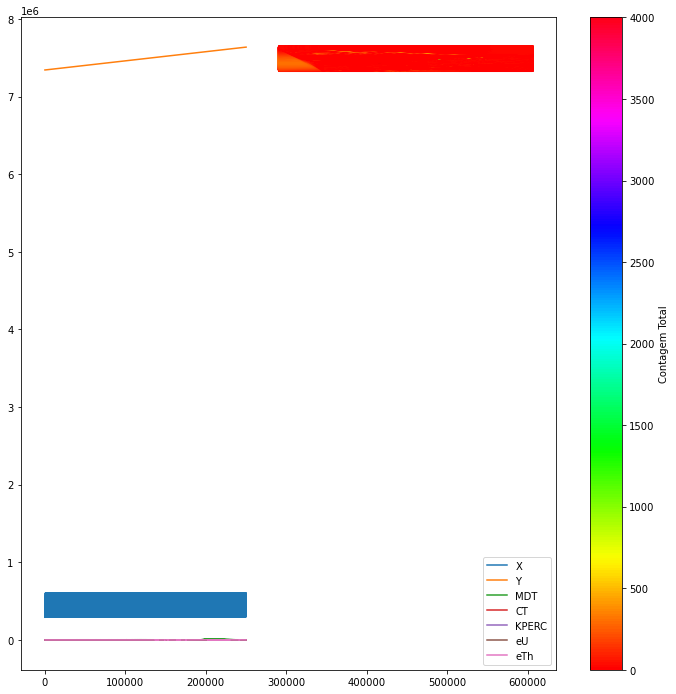

In [27]:
geo_data_1105.plot(figsize=(12,12))
plt.scatter(geo_data_1105.X, geo_data_1105.Y, cmap='hsv', s=10, c=geo_data_1105.CT,vmin=0,vmax=4000)
plt.colorbar(label=u'Contagem Total')
#plt.gca().set_aspect('equal')
#plt.gcf().set_size_inches(12, 8)

In [50]:
geo_data['geometry'] = [geometry.Point(x,y) for x, y in zip(geo_data['X'], geo_data['Y'])]

In [25]:
gdf = gpd.GeoDataFrame(geo_data)

In [31]:
gdf = gdf.set_crs('EPSG:32723')
#rparaim = rparaim.to_crs('EPSG:32723')

In [32]:
gdf = gdf.set_geometry('geometry')

In [33]:
gdf.crs

<Projected CRS: EPSG:32723>
Name: WGS 84 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - S hemisphere - 48°W to 42°W - by country
- bounds: (-48.0, -80.0, -42.0, 0.0)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
SF_23 = SF_23.set_geometry('geometry')

In [34]:
gdf

,X,Y,MDT,CT,KPERC,eU,eTh,geometry
0,448245.160000,7569035.34,1259.365337,1162.641011,0.645641,1.014426,12.998625,POINT (448245.160 7569035.340)
1,448348.902084,7569035.34,1293.523919,1014.894423,0.414994,1.392058,11.634912,POINT (448348.902 7569035.340)
2,448452.644168,7569035.34,1319.748234,736.232109,0.270898,0.629410,9.537711,POINT (448452.644 7569035.340)
3,448556.386253,7569035.34,1319.748234,736.232109,0.270898,0.629410,9.537711,POINT (448556.386 7569035.340)
4,448660.128337,7569035.34,1319.748234,736.232109,0.270898,0.629410,9.537711,POINT (448660.128 7569035.340)
...,...,...,...,...,...,...,...,...
249995,499597.491663,7622519.96,965.094240,1513.728316,0.508648,0.947921,18.571917,POINT (499597.492 7622519.960)
249996,499701.233748,7622519.96,976.609860,1648.207359,0.486749,1.300272,19.956881,POINT (499701.234 7622519.960)
249997,499804.975832,7622519.96,991.446872,1804.825881,0.456061,1.690462,21.623599,POINT (499804.976 7622519.960)
249998,499908.717916,7622519.96,991.446872,1804.825881,0.456061,1.690462,21.623599,POINT (499908.718 7622519.960)


In [3]:
import my_funcs as mf
l_1kk = mf.litologia('l_1kk')
SF_23 = mf.mapa(l_1kk, 'Rio de Janeiro')
SF_23 = SF_23.to_crs('EPSG:32723')

In [62]:
SF_23.plot('SIGLA')
plt.scatter(geo_data.X, geo_data.Y, cmap='hsv', s=10, c=geo_data.eTh, vmin=0, vmax=60)
plt.colorbar(label=u'eTh')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(12, 8)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [47]:
type(geo_data)

pandas.core.frame.DataFrame

In [49]:
geo_data

,X,Y,MDT,CT,KPERC,eU,eTh,geometry
0,448245.160000,7569035.34,1259.365337,1162.641011,0.645641,1.014426,12.998625,POINT (448245.16 7569035.34)
1,448348.902084,7569035.34,1293.523919,1014.894423,0.414994,1.392058,11.634912,POINT (448348.9020841683 7569035.34)
2,448452.644168,7569035.34,1319.748234,736.232109,0.270898,0.629410,9.537711,POINT (448452.6441683367 7569035.34)
3,448556.386253,7569035.34,1319.748234,736.232109,0.270898,0.629410,9.537711,POINT (448556.3862525051 7569035.34)
4,448660.128337,7569035.34,1319.748234,736.232109,0.270898,0.629410,9.537711,POINT (448660.1283366734 7569035.34)
...,...,...,...,...,...,...,...,...
249995,499597.491663,7622519.96,965.094240,1513.728316,0.508648,0.947921,18.571917,POINT (499597.4916633398 7622519.96)
249996,499701.233748,7622519.96,976.609860,1648.207359,0.486749,1.300272,19.956881,POINT (499701.2337475082 7622519.96)
249997,499804.975832,7622519.96,991.446872,1804.825881,0.456061,1.690462,21.623599,POINT (499804.9758316766 7622519.96)
249998,499908.717916,7622519.96,991.446872,1804.825881,0.456061,1.690462,21.623599,POINT (499908.7179158449 7622519.96)


In [1]:
SF_23['SIGLA'].iloc[SF_23.distance().idxmin()]

NameError: name 'SF_23' is not defined

In [68]:
geo_data['closest_unid'] = gdf['geometry'].apply(lambda x: SF_23['SIGLA'].iloc[SF_23.distance(x).idxmin()])

IndexError: single positional indexer is out-of-bounds

In [67]:
geo_data

,X,Y,MDT,CT,KPERC,eU,eTh,geometry
0,448245.160000,7569035.34,1259.365337,1162.641011,0.645641,1.014426,12.998625,POINT (448245.16 7569035.34)
1,448348.902084,7569035.34,1293.523919,1014.894423,0.414994,1.392058,11.634912,POINT (448348.9020841683 7569035.34)
2,448452.644168,7569035.34,1319.748234,736.232109,0.270898,0.629410,9.537711,POINT (448452.6441683367 7569035.34)
3,448556.386253,7569035.34,1319.748234,736.232109,0.270898,0.629410,9.537711,POINT (448556.3862525051 7569035.34)
4,448660.128337,7569035.34,1319.748234,736.232109,0.270898,0.629410,9.537711,POINT (448660.1283366734 7569035.34)
...,...,...,...,...,...,...,...,...
249995,499597.491663,7622519.96,965.094240,1513.728316,0.508648,0.947921,18.571917,POINT (499597.4916633398 7622519.96)
249996,499701.233748,7622519.96,976.609860,1648.207359,0.486749,1.300272,19.956881,POINT (499701.2337475082 7622519.96)
249997,499804.975832,7622519.96,991.446872,1804.825881,0.456061,1.690462,21.623599,POINT (499804.9758316766 7622519.96)
249998,499908.717916,7622519.96,991.446872,1804.825881,0.456061,1.690462,21.623599,POINT (499908.7179158449 7622519.96)
